In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  

# Ignore all warnings  
warnings.filterwarnings('ignore')

In [44]:
 df = pd.read_csv("student_depression_dataset.csv")

In [46]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [48]:
has_null = df.isnull().any().any()


In [50]:
has_null

False

In [52]:
df.shape

(27901, 18)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [56]:
df.drop(columns=['id'], inplace=True)


In [58]:
df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.replace("'", "").str.strip()
df.dropna(inplace=True)


In [60]:
from sklearn.preprocessing import LabelEncoder


In [62]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [64]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0


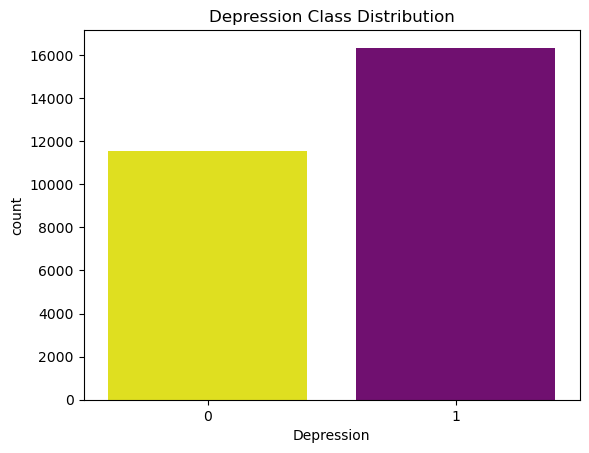

In [66]:
sns.countplot(x='Depression', data=df, palette=['yellow', 'purple'])
plt.title('Depression Class Distribution')
plt.show()

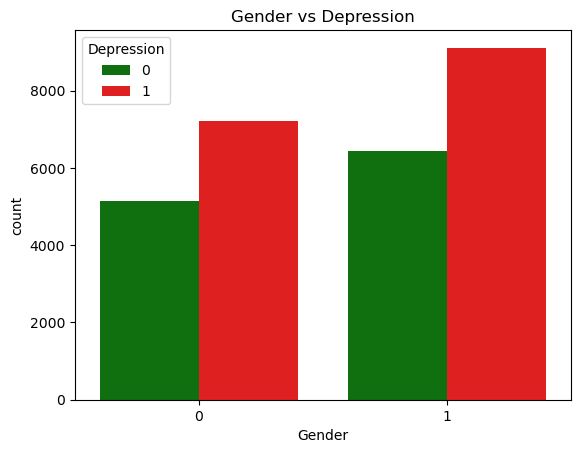

In [68]:
sns.countplot(x='Gender', hue='Depression', data=df, palette=['green', 'red'])
plt.title('Gender vs Depression')
plt.show()

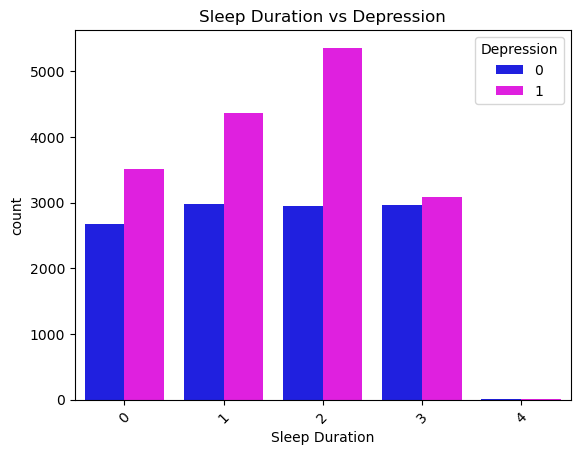

In [70]:
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette=['blue', 'magenta'])
plt.title('Sleep Duration vs Depression')
plt.xticks(rotation=45)
plt.show()

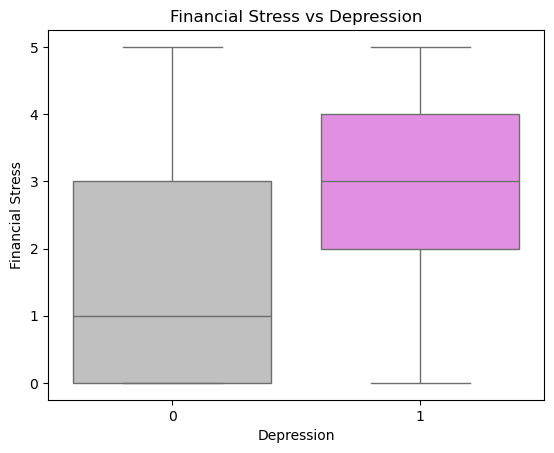

In [72]:
sns.boxplot(x='Depression', y='Financial Stress', data=df, palette=['silver', 'violet'])
plt.title('Financial Stress vs Depression')
plt.show()


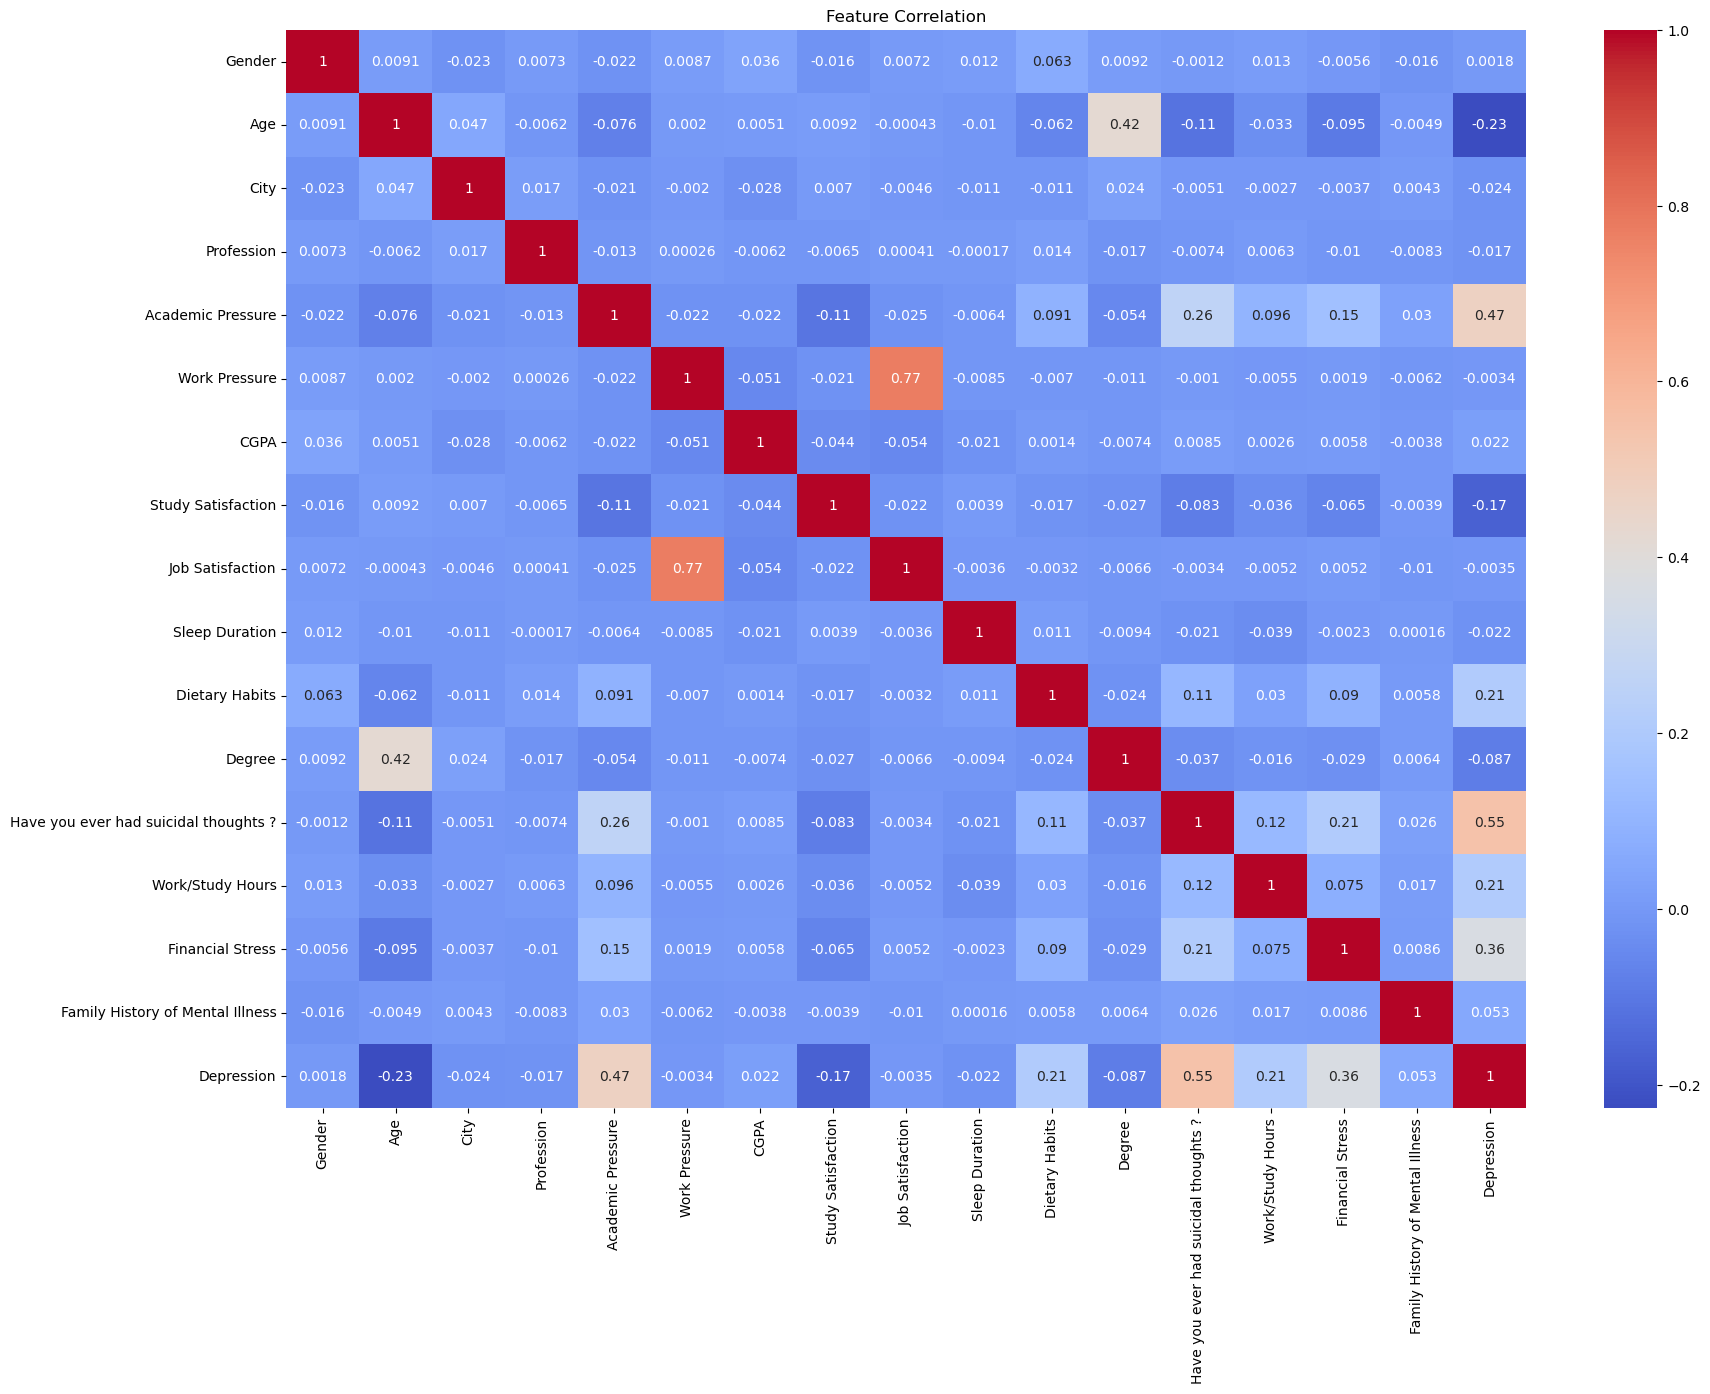

In [74]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [76]:
from sklearn.model_selection import train_test_split


In [78]:
X = df.drop('Depression', axis=1)
y = df['Depression']


In [90]:
X.shape

(27901, 16)

In [92]:
y.shape

(27901,)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
X_train.shape


(22320, 16)

In [84]:
X_test.shape


(5581, 16)

In [86]:
from sklearn.linear_model import LinearRegression


In [88]:
model = LinearRegression()

In [94]:
model.fit(X_train, y_train)


LinearRegression()

In [96]:
y_pred = model.predict(X_test)


In [98]:
from sklearn.metrics import accuracy_score
# If your model is returning probabilities (e.g., for binary classification)
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Now calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84


In [103]:
import pickle

In [107]:
filename = 'student_depression_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [109]:
model = pickle.load(open('student_depression_model.pkl', 'rb'))


In [111]:
model.predict(X_test)


array([0.26138578, 0.37319355, 0.48820375, ..., 1.00213115, 0.08455005,
       0.91691314])

In [113]:
print(df.columns)



Index(['Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')
